In [ ]:
import math
import pickle
import re

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from enum import Enum
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
sites_ids: "dict[str, str]" = {}
with open('site.pkl', 'rb') as f:
    sites_ids = pickle.load(f)

In [ ]:
for site in sites_ids:
  print(f'{site}: {sites_ids[site]}')

www.abmecatronique.com: 25075
groups.live.com: 13997
majeureliguefootball.wordpress.com: 42436
cdt46.media.tourinsoft.eu: 30911
www.hdwallpapers.eu: 8104
img378.imageshack.us: 37491
ecologie.nature.free.fr: 5462
www.ibcn.intec.ugent.be: 35425
kissanime.com: 30151
www.carolineconduiteformation.com: 38268
images.mystockphoto.com: 43641
journalph.csphares.qc.ca: 36959
www.uqo.ca: 40935
d8d94e0wul1nb.cloudfront.net: 12346
openapi.elong.com: 31023
flamenco-o.blogspot.com: 31114
www.pages-annuaire.net: 28165
smart2000.pagesperso-orange.fr: 31877
fast.forbes.com: 31070
i1-js-14-3-01-10077-536503633-i.init.cedexis-radar.net: 12938
i1-js-14-3-01-11074-716595896-i.init.cedexis-radar.net: 42002
www.pacajob.com: 5671
mathaa.epfl.ch: 32074
cbv.sfr.bench.cedexis.com: 7104
fbcdn-sphotos-b-a.akamaihd.net: 1939
www.mystere-tv.com: 6708
www.mon-ip.fr: 43589
www.aqua-passion.com: 45241
reunion.la1ere.fr: 16195
marketing.kognitio.com: 23921
www.calvin-thomas.com: 28449
i1-js-14-3-01-11074-157631352-i.init

KeyboardInterrupt: ignored

In [ ]:
df = pd.read_csv('train_ses.csv')

In [ ]:
df.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [ ]:
print(df.shape)
print(df.dropna().shape)

(253561, 22)
(231052, 22)


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231052 entries, 1 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  231052 non-null  int64  
 1   site1       231052 non-null  int64  
 2   time1       231052 non-null  object 
 3   site2       231052 non-null  float64
 4   time2       231052 non-null  object 
 5   site3       231052 non-null  float64
 6   time3       231052 non-null  object 
 7   site4       231052 non-null  float64
 8   time4       231052 non-null  object 
 9   site5       231052 non-null  float64
 10  time5       231052 non-null  object 
 11  site6       231052 non-null  float64
 12  time6       231052 non-null  object 
 13  site7       231052 non-null  float64
 14  time7       231052 non-null  object 
 15  site8       231052 non-null  float64
 16  time8       231052 non-null  object 
 17  site9       231052 non-null  float64
 18  time9       231052 non-null  object 
 19  si

In [ ]:
for clmn in df.columns:
  if clmn.startswith('site'):
    df[clmn] = df[clmn].astype('int64')

In [ ]:
for clmn in df.columns:
  if clmn.startswith('time'):
    df[clmn] = df[clmn].astype('datetime64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231052 entries, 1 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   session_id  231052 non-null  int64         
 1   site1       231052 non-null  int64         
 2   time1       231052 non-null  datetime64[ns]
 3   site2       231052 non-null  int64         
 4   time2       231052 non-null  datetime64[ns]
 5   site3       231052 non-null  int64         
 6   time3       231052 non-null  datetime64[ns]
 7   site4       231052 non-null  int64         
 8   time4       231052 non-null  datetime64[ns]
 9   site5       231052 non-null  int64         
 10  time5       231052 non-null  datetime64[ns]
 11  site6       231052 non-null  int64         
 12  time6       231052 non-null  datetime64[ns]
 13  site7       231052 non-null  int64         
 14  time7       231052 non-null  datetime64[ns]
 15  site8       231052 non-null  int64         
 16  ti

In [ ]:
df.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
1,2,890,2014-02-22 11:19:50,941,2014-02-22 11:19:50,3847,2014-02-22 11:19:51,941,2014-02-22 11:19:51,942,...,2014-02-22 11:19:51,3847,2014-02-22 11:19:52,3846,2014-02-22 11:19:52,1516,2014-02-22 11:20:15,1518,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39,2013-12-16 16:40:18,14768,2013-12-16 16:40:19,14769,2013-12-16 16:40:19,37,...,2013-12-16 16:40:19,14768,2013-12-16 16:40:20,14768,2013-12-16 16:40:21,14768,2013-12-16 16:40:22,14768,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782,2014-03-28 10:52:42,782,2014-03-28 10:53:12,782,2014-03-28 10:53:42,782,...,2014-03-28 10:54:42,782,2014-03-28 10:55:12,782,2014-03-28 10:55:42,782,2014-03-28 10:56:12,782,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177,2014-02-28 10:55:22,175,2014-02-28 10:55:22,178,2014-02-28 10:55:23,177,...,2014-02-28 10:55:59,175,2014-02-28 10:55:59,177,2014-02-28 10:55:59,177,2014-02-28 10:57:06,178,2014-02-28 10:57:11,0
6,7,803,2014-02-13 16:45:35,23,2014-02-13 16:45:35,5956,2014-02-13 16:45:35,17513,2014-02-13 16:45:35,37,...,2014-02-13 16:47:14,803,2014-02-13 16:47:14,17514,2014-02-13 16:47:15,17514,2014-02-13 16:47:16,17514,2014-02-13 16:47:17,0


In [ ]:
class SignBy(Enum):
    FIRST = 0
    SUM = 1
    AVG = 2

In [ ]:
time_columns = [clmn for clmn in df.columns if clmn.startswith('time')]

In [ ]:
def get_column_by_template(sign: SignBy, template=None) -> int:
  res_column = None
  if sign == SignBy.FIRST:
    return pd.Series([
      i.strftime(template) for i in df['time1']
    ])
  if sign == SignBy.SUM:
    clmn = df['time10'].subtract(df['time1'])
    return pd.Series([
      round(i.total_seconds() / 60) for i in clmn
    ])
  if sign == SignBy.AVG:
    copy = df[time_columns]
    new_df = pd.DataFrame()
    for n in range(1, 10):
      clmn = df[f'time{n + 1}'].subtract(df[f'time{n}'])
      new_df[f'time{n}'] = pd.Series([
        round(i.total_seconds() / 60) for i in clmn
      ])
    return new_df.mean(axis=1)

In [ ]:
yearmonth = get_column_by_template(SignBy.FIRST, '%Y%m')

In [ ]:
sumtime = get_column_by_template(SignBy.SUM)

In [ ]:
avgtime = get_column_by_template(SignBy.AVG)

In [ ]:
future_df = pd.DataFrame(columns=sites_ids.values())

In [ ]:
df_test = df.head(10)

In [ ]:
data = []

for index, series in df_test.iterrows():
  session_sites = {}
  for column in df_test.columns:
    if column.startswith('site'):
      site_index = series[column]
      if math.isnan(site_index):
        continue
      session_sites[site_index] = session_sites.get(site_index, 0) + 1
  data.append({series['session_id']: session_sites})

In [ ]:
data

[{2: {890: 1, 941: 2, 3847: 2, 942: 1, 3846: 2, 1516: 1, 1518: 1}},
 {3: {14769: 2, 39: 2, 14768: 5, 37: 1}},
 {4: {782: 10}},
 {5: {22: 1, 177: 4, 175: 2, 178: 3}},
 {7: {803: 2, 23: 1, 5956: 1, 17513: 1, 37: 1, 21: 1, 17514: 3}},
 {8: {22: 1, 21: 2, 29: 1, 5041: 2, 14422: 1, 23: 1, 14421: 2}},
 {9: {668: 1, 940: 2, 942: 2, 941: 2, 23: 1, 21: 1, 22: 1}},
 {10: {3700: 1, 229: 2, 570: 1, 21: 4, 2336: 1, 2044: 1}},
 {11: {229: 1,
   1500: 2,
   33: 1,
   391: 1,
   35: 1,
   29: 1,
   2276: 1,
   40305: 1,
   23: 1}},
 {12: {37: 1, 39: 1, 3592: 2, 890: 1, 35: 1, 29: 1, 22: 1, 30: 1, 33: 1}}]

In [ ]:
for session in data:
  session_id = next(iter(session))
  future_df = future_df.append(session[session_id], ignore_index=True)

In [ ]:
future_df

,25075,13997,42436,30911,8104,37491,5462,35425,30151,38268,...,13541,10039,25982,1617,8382,29738,40794,10939,40028,43410
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_matrix = csr_matrix(future_df.values)

In [ ]:
df_visual = df.drop('session_id', axis=1)

In [ ]:
for clmn in time_columns:
  df_visual = df_visual.drop(clmn, axis=1)

In [ ]:
df_visual['yearmonth'] = df_visual.assign(yearmonth=yearmonth.values)['yearmonth']
df_visual['sumtime'] = df_visual.assign(sumtime=sumtime.values)['sumtime']
df_visual['avgtime'] = df_visual.assign(avgtime=avgtime.values)['avgtime']

In [ ]:
y = df_visual['target']
df_visual = df_visual.drop('target', axis=1)

In [ ]:
# выражаем имеющиеся данные для формирования графика
rf = RandomForestClassifier(random_state=0, n_jobs=-1) 
rf_model = rf.fit(df_visual, y)
names = df_visual.columns.values 
ticks = [i for i in range(len(rf_model.feature_importances_))]

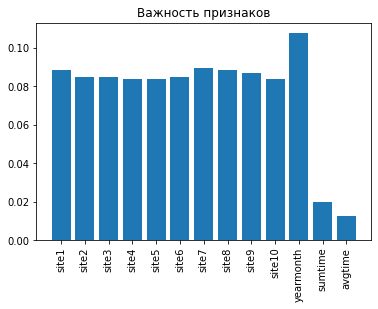

In [ ]:
# строим график
plt.figure()
plt.title('Важность признаков')
plt.bar(names, rf_model.feature_importances_)
plt.xticks(ticks, names, rotation=90)
plt.show()

In [ ]:
important_columns = []
for column, value in zip(names, rf_model.feature_importances_):
  if value >= 0.085:
    important_columns.append(column)

idf = df_visual[important_columns]
idf.head(10)

,site1,site7,site8,site9,yearmonth
1,890,3847,3846,1516,201402
2,14769,14768,14768,14768,201312
3,782,782,782,782,201403
4,22,175,177,177,201402
6,803,803,17514,17514,201402
7,22,21,5041,14421,201304
8,668,940,23,21,201403
9,3700,21,21,2336,201402
10,229,29,2276,40305,201401
11,37,22,30,33,201401


In [ ]:
feature = StandardScaler().fit_transform(idf.values)
x_train, x_test, y_train, y_test = train_test_split(
    feature,
    y,
    test_size=0.2,
)

In [ ]:
classifer = GaussianNB()
model = classifer.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9895912228690139

In [ ]:
classifer = KNeighborsClassifier(n_neighbors=5)
model = classifer.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9901322196013936

In [ ]:
classifer = LogisticRegression()
model = classifer.fit(x_train, y_train)
y_pred = classifer.predict(x_test)
accuracy_score(y_test, y_pred)

0.9895912228690139

In [ ]:
classifer = RandomForestClassifier(n_jobs=-1) 
model = classifer.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.991322412412629